In [1]:
#Exercise 8
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt

Covariance of origion data:
 (3, 3)
Eigende Values:
 [ 2.67826209e+01 -9.33586311e-16  2.07446178e+00]
SVD Values:
 [7.18026809e-01 4.30769938e-03 9.54852305e-34]
Eigende Vectors:
 [[-0.11138918 -0.81649658  0.56650312]
 [-0.58243261 -0.40824829 -0.70292645]
 [-0.80521097  0.40824829  0.43007979]]
SVD Vectors V:
 [[-0.11138918  0.56650312 -0.81649658]
 [-0.58243261 -0.70292645 -0.40824829]
 [-0.80521097  0.43007979  0.40824829]]
Lambda:
 [[ 2.67826209e+01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -9.33586311e-16  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  2.07446178e+00]] 

Trace(d):
 28.857082675386792 

Trace(Lambda):
 28.857082675386803 

By selecting the component 0, we retain 0.93% of the total variability



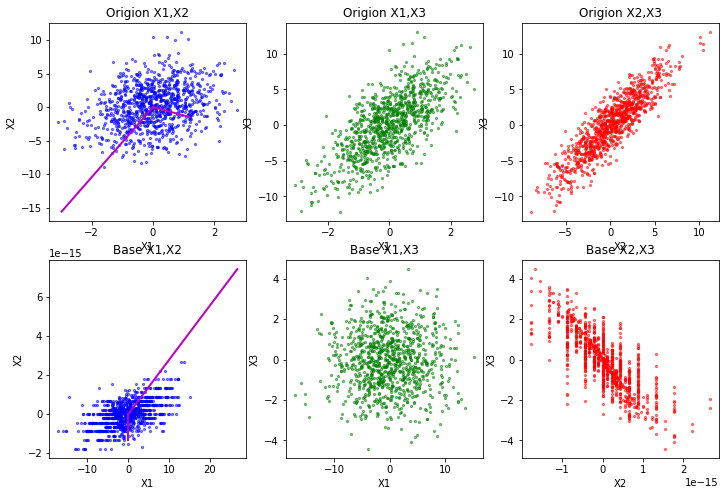

In [4]:
#Exercise1
import pandas as pd
import numpy as np
from scipy import linalg as ld

mu_sigma_1=[0,1]
mu_sigma_2=[0,3]
no=1000
x1= np.random.normal(loc= mu_sigma_1[0], scale= mu_sigma_1[1], size= no)#np.array([[1, 2, 3]])
x2= x1 + np.random.normal(loc=mu_sigma_2[0], scale= mu_sigma_2[1], size= no)#np.array([[4, 5, 6]])
x3= 2* x1 + x2
d= [x1,x2,x3]

#x = np.concatenate((x1, x2,x3))
#d = x.T #data, each cols indicate one feature, x1,x2,x3
#print(dt,"\n")

#covariance
cov = np.cov(d)
print("Covariance of origion data:\n", cov.shape)
#eigenvectors and eigenvalues using the eigendecomposition
l,v= la.eig(cov)
l = np.real_if_close(l)


#eigenvectors and eigenvalues using the SVD
u,s,vt=la.svd(cov) #Based on lecture I shout pass d instead of cov to the sdv() function
                   #But If I do the answer is going to be wrong!??? 
l_svd = s**2/(no-1)
v_svd = u

# Compare Eigenvalues & Eigenvectors
print("Eigende Values:\n", l)
print("SVD Values:\n", l_svd)
print("Eigende Vectors:\n", v)
print("SVD Vectors V:\n", v_svd)

# rotate all the data points by new base 
lambda_l = np.diag(l)
print("Lambda:\n", lambda_l, '\n')
print("Trace(d):\n", cov.trace(), '\n')
print("Trace(Lambda):\n", lambda_l.trace(), '\n')
print("By selecting the component 0, we retain %.2f%% of the total variability\n" % (lambda_l[0, 0]/lambda_l.trace()))

#Redefine the data according to the new basis from the PCA
Dp = np.dot(v.T, d)
# rotate back the data
#Dpp = np.dot(v,Dp)

#Plot the data, in both the original and the new basis
#The figure should have 2 rows (the original and the new basis) and 3 columns
fig, [[ax1, ax2, ax3],[ax4,ax5,ax6]]= plt.subplots(nrows=2, ncols=3, figsize=(12,8))
#Origion-------------
ax1.set_title('Origion X1,X2')
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.scatter(d[0],d[1], alpha=0.5, c='b', s=5)

ax2.set_title('Origion X1,X3')
ax2.set_xlabel('X1')
ax2.set_ylabel('X3')
ax2.scatter(d[0],d[2], alpha=0.5, c='g', s=5)

ax3.set_title('Origion X2,X3')
ax3.set_xlabel('X2')
ax3.set_ylabel('X3')
ax3.scatter(d[1],d[2], alpha=0.5, c='r', s=5)


# draw each eigenvectors rescaled by the eigenvalues
scale_factor = 1
for li, vi in zip(l, v.T):
    # the line is defined by specifying its beginning and its end 
    ax1.plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[1]], 'm-', lw=2)


#Base-------------
ax4.set_title('Base X1,X2')
ax4.set_xlabel('X1')
ax4.set_ylabel('X2')
ax4.scatter(Dp[0],Dp[1], alpha=0.5, c='b', s=5)

ax5.set_title('Base X1,X3')
ax5.set_xlabel('X1')
ax5.set_ylabel('X3')
ax5.scatter(Dp[0],Dp[2], alpha=0.5, c='g', s=5)

ax6.set_title('Base X2,X3')
ax6.set_xlabel('X2')
ax6.set_ylabel('X3')
ax6.scatter(Dp[1],Dp[2], alpha=0.5, c='r', s=5)


# draw each eigenvectors rescaled by the eigenvalues
for li, vi in zip(l, np.dot(v.T,v)):
    # the line is defined by specifying its beginning and its end 
    ax4.plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[1]], 'm-', lw=2)

#??? Why Eigende Values is not equal to SVD Values?!!!


Covariance of origion data:
 (3, 3)
Eigende Values:
 [2.67669138e+01 3.65522392e-03 2.07741194e+00]
SVD Values:
 [7.17184858e-01 4.31996033e-03 1.33740359e-08]
Eigende Vectors:
 [[-0.1115977  -0.81671211  0.56615129]
 [-0.58184681 -0.40814629 -0.7034706 ]
 [-0.80560551  0.40791902  0.42965316]]
SVD Vectors V:
 [[-0.1115977   0.56615129 -0.81671211]
 [-0.58184681 -0.7034706  -0.40814629]
 [-0.80560551  0.42965316  0.40791902]]
By selecting the component 0, we retain 0.93% of the total variability



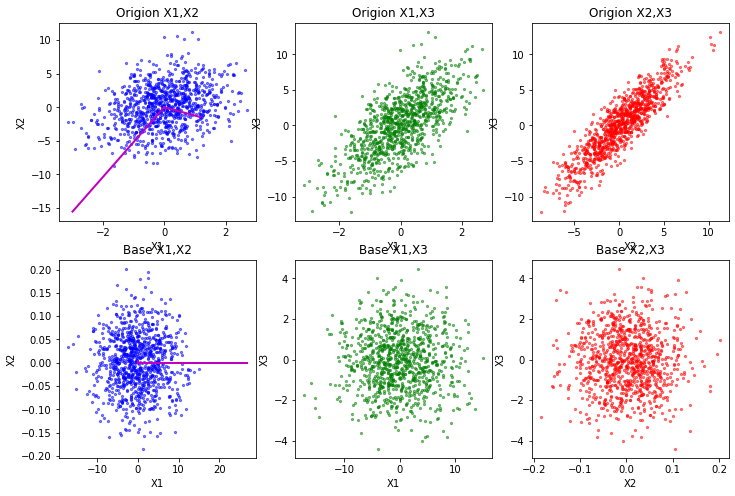

In [5]:
#Exercise2
noise= np.random.normal(loc=0,scale=1/50,size=(3,1000,10)) 
noisy_d = d + np.sum(noise, axis=2)

#covariance
cov = np.cov(noisy_d)
print("Covariance of origion data:\n", cov.shape)

#eigenvectors and eigenvalues using the eigendecomposition
l,v= la.eig(cov)
l = np.real_if_close(l)

#eigenvectors and eigenvalues using the SVD
u,s,vt=la.svd(cov)
l_svd = s**2/(no-1)
v_svd = u

# Compare Eigenvalues & Eigenvectors
print("Eigende Values:\n", l)
print("SVD Values:\n", l_svd)
print("Eigende Vectors:\n", v)
print("SVD Vectors V:\n", v_svd)

# rotate all the data points by new base 
lambda_l = np.diag(l)
print("By selecting the component 0, we retain %.2f%% of the total variability\n" % (lambda_l[0, 0]/lambda_l.trace()))

#Redefine the data according to the new basis from the PCA
Dp_noisy = np.dot(v.T, noisy_d)

#Plot the data, in both the original and the new basis
#The figure should have 2 rows (the original and the new basis) and 3 columns
fig, [[ax1, ax2, ax3],[ax4,ax5,ax6]]= plt.subplots(nrows=2, ncols=3, figsize=(12,8))
#Origion-------------
ax1.set_title('Origion X1,X2')
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.scatter(noisy_d[0],noisy_d[1], alpha=0.5, c='b', s= 5)

ax2.set_title('Origion X1,X3')
ax2.set_xlabel('X1')
ax2.set_ylabel('X3')
ax2.scatter(noisy_d[0],noisy_d[2], alpha=0.5, c='g', s= 5)

ax3.set_title('Origion X2,X3')
ax3.set_xlabel('X2')
ax3.set_ylabel('X3')
ax3.scatter(noisy_d[1],noisy_d[2] , alpha=0.5, c='r', s= 5)

# draw each eigenvectors rescaled by the eigenvalues
scale_factor = 1
for li, vi in zip(l, v.T):
    # the line is defined by specifying its beginning and its end 
    ax1.plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[1]], 'm-', lw=2)

#Base-------------
ax4.set_title('Base X1,X2')
ax4.set_xlabel('X1')
ax4.set_ylabel('X2')
ax4.scatter(Dp_noisy[0],Dp_noisy[1], alpha=0.5, c='b', s= 5)

ax5.set_title('Base X1,X3')
ax5.set_xlabel('X1')
ax5.set_ylabel('X3')
ax5.scatter(Dp_noisy[0],Dp_noisy[2], alpha=0.5, c='g', s= 5)

ax6.set_title('Base X2,X3')
ax6.set_xlabel('X2')
ax6.set_ylabel('X3')
ax6.scatter(Dp_noisy[1],Dp_noisy[2], alpha=0.5, c='r', s= 5)

# draw each eigenvectors rescaled by the eigenvalues
for li, vi in zip(l, np.dot(v.T,v)):
    # the line is defined by specifying its beginning and its end 
    ax4.plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[1]], 'm-', lw=2)


In [6]:
#Perform a PCA on the magic04.data dataset.
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 


Covariance of origion data:
 (10, 10)
By selecting the component 0, we retain 0.44% of the total variability

The selected component : 0. With this component 44.04% of the total variability gained
The selected component : 1. With this component 25.80% of the total variability gained
The selected component : 2. With this component 13.50% of the total variability gained
The selected component : 3. With this component 8.88% of the total variability gained
The selected component : 4. With this component 4.08% of the total variability gained
The selected component : 5. With this component 2.90% of the total variability gained
The selected component : 6. With this component 0.79% of the total variability gained
The selected component : 7. With this component 0.00% of the total variability gained
The selected component : 8. With this component 0.00% of the total variability gained
The selected component : 9. With this component 0.00% of the total variability gained

Total variability precent 

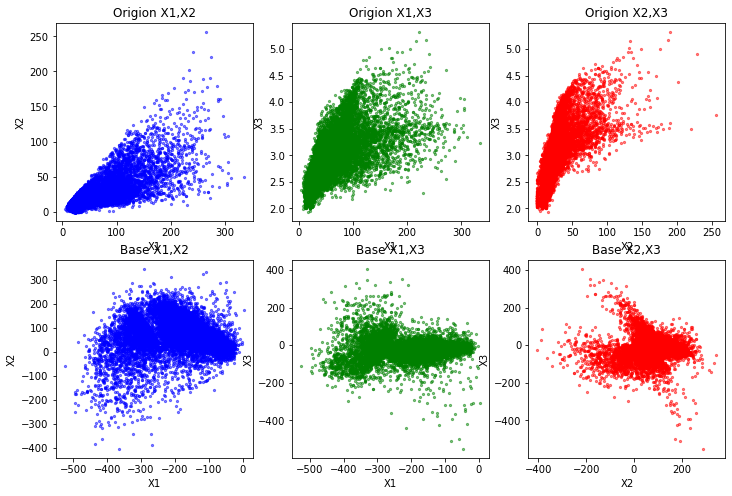

In [8]:
#Exercise3
file = 'data/magic04.data' 
data = pd.read_csv(file)
d = data.to_numpy()
d = d[0:,0:10]
d = np.asarray(d,dtype='float32')

d = d.T
#covariance
cov = np.cov(d)
print("Covariance of origion data:\n", cov.shape)
#eigenvectors and eigenvalues using the eigendecomposition
l,v= la.eig(cov)
l = np.real_if_close(l)

#eigenvectors and eigenvalues using the SVD
u,s,vt=la.svd(cov) #Based on lecture I shout pass d instead of cov to the sdv() function
                   #But If I do the answer is going to be wrong!??? 
l_svd = s**2/(no-1)
v_svd = u

# rotate all the data points by new base 
lambda_l = np.diag(l)
print("By selecting the component 0, we retain %.2f%% of the total variability\n" % (lambda_l[0, 0]/lambda_l.trace()))

#Redefine the data according to the new basis from the PCA
Dp = np.dot(v.T, d)

variability=[]
for i in range(len(l)):
    variability.append(100*abs((lambda_l[i,i]/lambda_l.trace())))
    print('The selected component : ' + str(i) +'. With this component %.2f%% of the total variability gained' % (100*abs((lambda_l[i,i]/lambda_l.trace()))))

print("\nTotal variability precent is: " , np.sum(variability))
#Plot----
fig, [[ax1, ax2, ax3],[ax4,ax5,ax6]]= plt.subplots(nrows=2, ncols=3, figsize=(12,8))
#Origion-------------
ax1.set_title('Origion X1,X2')
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.scatter(d[0],d[1], alpha=0.5, c='b', s=5)

ax2.set_title('Origion X1,X3')
ax2.set_xlabel('X1')
ax2.set_ylabel('X3')
ax2.scatter(d[0],d[2], alpha=0.5, c='g', s=5)

ax3.set_title('Origion X2,X3')
ax3.set_xlabel('X2')
ax3.set_ylabel('X3')
ax3.scatter(d[1],d[2], alpha=0.5, c='r', s=5)

#Base-------------
ax4.set_title('Base X1,X2')
ax4.set_xlabel('X1')
ax4.set_ylabel('X2')
ax4.scatter(Dp[0],Dp[1], alpha=0.5, c='b', s=5)

ax5.set_title('Base X1,X3')
ax5.set_xlabel('X1')
ax5.set_ylabel('X3')
ax5.scatter(Dp[0],Dp[2], alpha=0.5, c='g', s=5)

ax6.set_title('Base X2,X3')
ax6.set_xlabel('X2')
ax6.set_ylabel('X3')
ax6.scatter(Dp[1],Dp[2], alpha=0.5, c='r', s=5)
    
